# **Content**

**Classification**

  * Naive Bayes
    <ul>
    <li>Bernoulli Naive Bayes</li>
    <li>Gaussian Naive Bayes</li>
    </ul>
  * Discriminant Analysis
    <ul>
    <li>Linear</li>
    <li>Quadratic</li>
    </ul>
  * Decision Trees
    <ul>
    <li>Descision Tree Classifier</li>
    <li>Extra Trees</li>
    <li>Random Forest</li>
    </ul>
  * Nearest Neighbors
    <ul>
    <li>K Nearest Neighbors</li>
    <li>Nearest Centroid</li>
    <li>Radius Nearest Neighbors</li>
    <li>Time Series Nearest Neighbors</li>
    </ul>
  * Non-Myopic Early Classifier
  * Passive Aggressive Classifier
  * Stochastic Gradient Descent
  * Support Vector Classifiers
    <ul>
    <li>Support Vector</li>
    <li>Nu Support Vector</li>
    <li>Time Series Support Vector</li>
    </ul>
  * Bagging & Boosting
    <ul>
    <li>Adaboost</li>
    <li>Bagging</li>
    <li>Gradient Boost</li>
    <li>Histogram Gradient Boost</li>
    </ul>


# Using Google Colab with Tutorial

If using Google Colab, run the following code prior to running any tutorial code.  If running code locally, ignore this section

In [1]:
# Inastall the required packages
!pip install numpy
!pip install EMD_signal
!pip install ewtpy
!pip install matplotlib
!pip install padasip==1.2.2
!pip install pandas
!pip install pytz
!pip install PyWavelets
!pip install scikit_learn
!pip install sktime
!pip install scipy
!pip install seaborn
!pip install statsmodels==0.13.5
!pip install tslearn==0.6.1
!pip install vmdpy==0.2
!pip install tftb
!pip install tqdm
!pip install ssqueezepy
!pip install numba
!pip install jupyter
!pip install fastsst --no-deps
!pip install sktime
!pip install chart_studio
!pip install plotly

In [1]:
# This code clones the SensorAI github repository to colab
  # Note: rerunning this code segment will give an error if the repository currently exists in your colab
!git clone https://github.com/wsonguga/SensorAI.git

# Once this code is executed, click the file icon to the left to verify all files have been cloned

fatal: destination path 'SensorAI' already exists and is not an empty directory.


In [2]:
# Set the root path to github repository
import os

root_path = "/content/SensorAI"

repo_root = os.path.join("/content/SensorAI")

!ls

sample_data  SensorAI


In [3]:
# Change to the tutorial repository
import os

os.chdir('SensorAI')

%ls             # display directory content

anomaly_detection/  __pycache__/      sk_classifier_builder.py  temp.py
data/               PyEMD/            sk_clustering_builder.py  tutorial_classification.ipynb
dsp.py              README.md         sk_grid_builder.py        tutorial_clustering.ipynb
install.sh*         requirements.txt  sk_novelty_builder.py     tutorial_dsp.ipynb
instance/           SensorAI/         sk_regressor_builder.py


In [4]:
# This command pulls any updated files from the repository
# This code segment may be re-executed at any point if there have been updates to the repository
!git pull https://github.com/wsonguga/SensorAI.git

remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 15 (delta 10), reused 11 (delta 6), pack-reused 0
Unpacking objects: 100% (15/15), 6.57 MiB | 3.79 MiB/s, done.
From https://github.com/wsonguga/SensorAI
 * branch            HEAD       -> FETCH_HEAD
Updating 176de04..0206dae
Fast-forward
 sk_grid_builder.py            | 158 +++++++++++-------
 temp.py                       |  77 ++++++++-
 tutorial_classification.ipynb | 110 +++++++------
 tutorial_clustering.ipynb     | 550 +++++++++++++++++++++++++++++++++++++++++++++-----------------
 4 files changed, 643 insertions(+), 252 deletions(-)


# Classification

## Naive Bayes
From **Analytics Vidhya**.  See references [1] & [2]

Modified: **Stephen Coshatt**
</br></br>

**References:**

1.   https://www.analyticsvidhya.com/blog/2021/11/implementation-of-gaussian-naive-bayes-in-python-sklearn/
2.   https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/
3.   https://www.upgrad.com/blog/naive-bayes-classifier/
4.   https://machinelearninginterview.com/topics/machine-learning/naive-bayes-classifier-advantages-and-disadvantages/

</br></br>

**Naive Bayes** classification algorithms are probabilistic models based on Bayes Theorem <a href="https://www.w3schools.com">[1]</a>.  Naïve Bayes is a probabilistic algorithm that is based on the concept of conditional probability <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>. We know it not only for its simplicity but also for its speed <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>.

We also defined it as an algorithm is a simple and fast machine learning algorithm that is often favored in cases of real-time predictions <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>.

In Bayes Theorem, probability is defined as the likelihood of an event occuring.  P(A/B) is the conditional probability of A given B, or the likelihood of event A if event B has already occurred. Because we already know that B has happened when we experiment, the number of alternative outcomes for the event has been limited <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>. As a result, given that B has already occurred, the unconditional probability has now changed to a conditional probability <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>.

We define the conditional probability as <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>:

𝑃(𝐴/𝐵) = 𝑃(𝐴 ∩ 𝐵) 𝑃(𝐵)

Where 𝑃(𝐴 ∩ 𝐵) represents the joint probability, i.e. probability, of both events happening together [2].

There are three types of Naive Bayes Classifiers:

1. Gaussian Naive Bayes - This classifier is employed when the predictor values are continuous and are expected to follow a Gaussian distribution <a href="https://www.analyticsvidhya.com/blog/2021/11/implementation-of-gaussian-naive-bayes-in-python-sklearn/">[1]</a>.  the assumption is made that the continuous numerical attributes are distributed normally <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>. The attribute is first segmented based on the output class, and then the variance and mean of the attribute are calculated for each class <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>.

2.  Bernoulli Naive Bayes - When the predictors are boolean in nature and are supposed to follow the Bernoulli distribution, this classifier is utilized <a href="https://www.analyticsvidhya.com/blog/2021/11/implementation-of-gaussian-naive-bayes-in-python-sklearn/">[1]</a>.  The features are distributed according to multivariate Bernoulli distributions <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>. This means that there may be multiple features, but each one will be an independent Boolean variable [2]. Hence, it requires the samples to be binary-values <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>. Similar to the multinomial algorithm, the Bernoulli algorithm is popular for text classification, where binary occurrences are used in place of term frequencies <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>.

3.  Multinomial Naive Bayes - This classifier makes use of a multinomial distribution and is often used to solve issues involving document or text classification <a href="https://www.analyticsvidhya.com/blog/2021/11/implementation-of-gaussian-naive-bayes-in-python-sklearn/">[1]</a>.  We prefer the multinomial Naïve Bayes model when the data is multinomially distributed. The feature vectors represent the frequency with which a multinomial has generated a certain event <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>. We mostly used the multinomial Naïve Bayes algorithm in cases of text classification <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>.

**Naive Bayes Classifiers**

It is a supervised machine learning algorithm for classification based on Bayes' theorem. The algorithm learns the probability of data instances belonging to a particular class. Hence, it is a probabilistic classifier. <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>

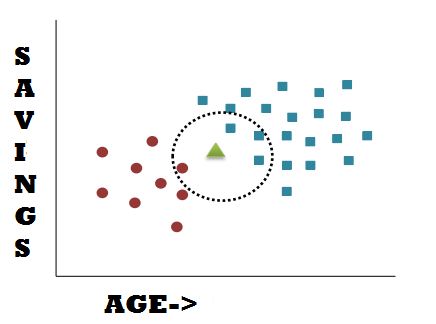

The reason for calling it "naïve" is that it assumes that the occurrence of a particular feature (X) is independent of the occurrence of any other features (any other Xs). For example, we can predict fruit as an apple if it is red, round, and 2 inches in width. These features independently contribute to the probability that the predicted fruit is an apple, even though these features depend on each other. <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>

This can also be considered as an advantage since the Naïve Bayes algorithm requires only a small amount of training data for the estimation of the parameters of the algorithm. <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>

In the above picture, the red circle category represents the person who does not own a bike, whereas the blue square category represents the person who owns a bike. There is another data point marked by the Green triangle. How do we find out in which category does the data point lie or if the person owns a bike? [2]

Let us use the Naïve Bayes algorithm to solve this problem. First, we calculate the probability of a person owning a bike or not. The total data points are 30, red points are 9 and blue points are 21. <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>

𝑃(𝑁𝑜 𝑏𝑖k𝑒) = 9/30 𝑃(𝑏𝑖k𝑒) = 21/30

The new data point is like the data points in that circle, it may have any radius value. The marginal probability says that if we add a new point, <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>

𝑃(𝑃𝑜𝑖𝑛𝑡) = 𝑁𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑂𝑏𝑠𝑒𝑟𝑣𝑎𝑡𝑖𝑜𝑛𝑠 𝑖𝑛 𝑐𝑖𝑟𝑐𝑙𝑒/ 𝑇𝑜𝑡𝑎𝑙 𝑂𝑏𝑠𝑒𝑟𝑣𝑎𝑡𝑖𝑜𝑛𝑠 = 4/30

The next probability that we will calculate will say that the new data point will lie in the circle given that the person does not own a bike. <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>

𝑃 ( 𝑃𝑜𝑖𝑛𝑡 / 𝑁𝑜 𝑏𝑖k𝑒 ) = 𝑁𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑁𝑜 𝑏𝑖k𝑒 𝑂𝑏𝑠𝑒𝑟𝑣𝑎𝑡𝑖𝑜𝑛𝑠 𝑖𝑛 𝑐𝑖𝑟𝑐𝑙𝑒 /𝑇𝑜𝑡𝑎𝑙 𝑂𝑏𝑠𝑒𝑟𝑣𝑎𝑡𝑖𝑜𝑛𝑠 𝑜𝑓 𝑁𝑜 𝑏𝑖k𝑒 = 1/9

The posterior probability is given by, <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>

𝑃(𝑁𝑜 𝑏𝑖k𝑒/𝑃𝑜𝑖𝑛𝑡) = 1 / 4 = 0.25

So there is a 25% chance that the given data point/person does not own a bike. Calculate the other posterior probability. <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>

𝑃(𝑏𝑖k𝑒/𝑃𝑜𝑖𝑛𝑡) = 3 / 4 = 0.75

And there's a 75% probability the person owns a bike. As a result, the new person is more likely to own a bike. After then, we will classify the point as a person who owns a bike. The Naive Bayes algorithm works in this way. <a href="https://www.analyticsvidhya.com/blog/2022/03/gaussian-naive-bayes-algorithm-for-credit-risk-modelling/">[2]</a>


</br>

**Advantages:**

* This algorithm works very fast and can easily predict the class of a test dataset. <a href="https://www.upgrad.com/blog/naive-bayes-classifier/">[3]</a> <a href="https://machinelearninginterview.com/topics/machine-learning/naive-bayes-classifier-advantages-and-disadvantages/">[4]</a>
* You can use it to solve multi-class prediction problems as it's quite useful with them. <a href="https://www.upgrad.com/blog/naive-bayes-classifier/">[3]</a>
* Naive Bayes classifier performs better than other models with less training data if the assumption of independence of features holds. <a href="https://www.upgrad.com/blog/naive-bayes-classifier/">[3]</a>
* If you have categorical input variables, the Naive Bayes algorithm performs exceptionally well in comparison to numerical variables. <a href="https://www.upgrad.com/blog/naive-bayes-classifier/">[3]</a>
* It can be used for Binary and Multi-class Classifications. <a href="https://www.upgrad.com/blog/naive-bayes-classifier/">[3]</a>
* It effectively works in Multi-class predictions. <a href="https://www.upgrad.com/blog/naive-bayes-classifier/">[3]</a>

**Disadvantages:**

* If your test data set has a categorical variable of a category that wasn't present in the training data set, the Naive Bayes model will assign it zero probability and won't be able to make any predictions in this regard. This phenomenon is called 'Zero Frequency,' and you'll have to use a smoothing technique to solve this problem. <a href="https://www.upgrad.com/blog/naive-bayes-classifier/">[3]</a>
* This algorithm is also notorious as a lousy estimator. So, you shouldn't take the probability outputs of 'predict_proba' too seriously (perdict_proba is a built in sklearn function). <a href="https://www.upgrad.com/blog/naive-bayes-classifier/">[3]</a>
* It assumes that all the features are independent. While it might sound great in theory, in real life, you'll hardly find a set of independent features. <a href="https://www.upgrad.com/blog/naive-bayes-classifier/">[3]</a> <a href="https://machinelearninginterview.com/topics/machine-learning/naive-bayes-classifier-advantages-and-disadvantages/">[4]</a>




In [1]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
import random
from dsp import sine_wave, triangle_wave, square_wave, generate_class_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split


x, y = generate_class_data(wave_number=100)

# Normalize Data
x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

n_classes = int(np.amax(y_train)+1)
print("number of classes is ",n_classes)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


ModuleNotFoundError: No module named 'tftb'

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.044):
{'mnb__alpha': 1.0, 'mnb__binarize': 0.0, 'mnb__class_prior': None, 'mnb__fit_prior': True}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=0.000):
{'gnb__priors': None, 'gnb__var_smoothing': 1e-09}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



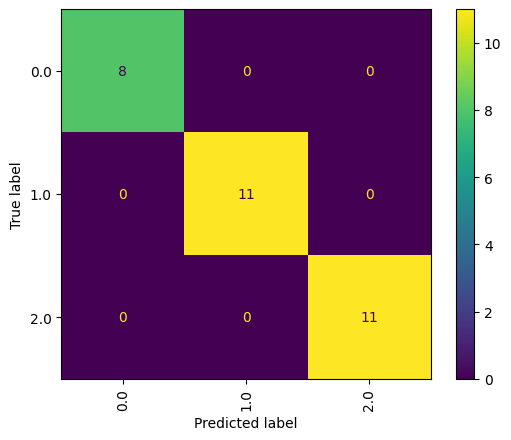

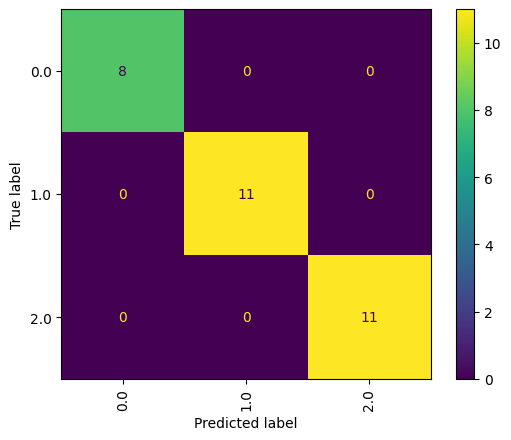

In [6]:
# SETUP & RUN NAIVE BAYES GRIDSEARCH TRAINING & TESTING

# import the classifier builders from the cloned python files
import sk_classifier_builder as skc
import sk_grid_builder as sgb

bnb = skc.pipeBuild_BernoulliNB()
gnb = skc.pipeBuild_GaussianNB()

names=['Bernoulli NB','Guassian NB']
pipes=[bnb,gnb]

# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
sgb.gridsearch_classifier(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,plot_number=3)

## Discriminant Analysis
This section discusses Linear Discriminant Analysis Classification and Quadratic Discriminant Analysis Classification

From: **DataSklr**

*Updated: Stephen Coshatt*

<br/>

**References:**

1.   https://www.datasklr.com/select-classification-methods/linear-and-quadratic-discriminant-analysis
2.  https://scikit-learn.org/stable/modules/lda_qda.html
3.  https://medium.com/analytics-vidhya/pros-and-cons-of-popular-supervised-learning-algorithms-d5b3b75d9218
4.  https://www.playerzero.ai/advanced/ai-terms-explained/quadratic-discriminant-analysis-ai-terms-explained

</br>

##Discriminant Analysis <a href="https://scikit-learn.org/stable/modules/lda_qda.html">[2]</a>

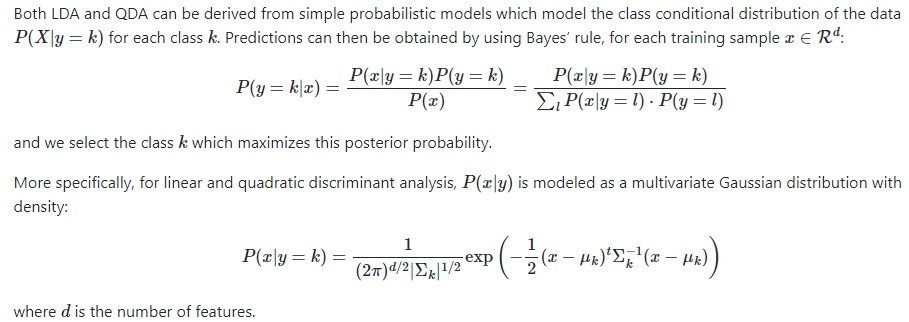

</br>

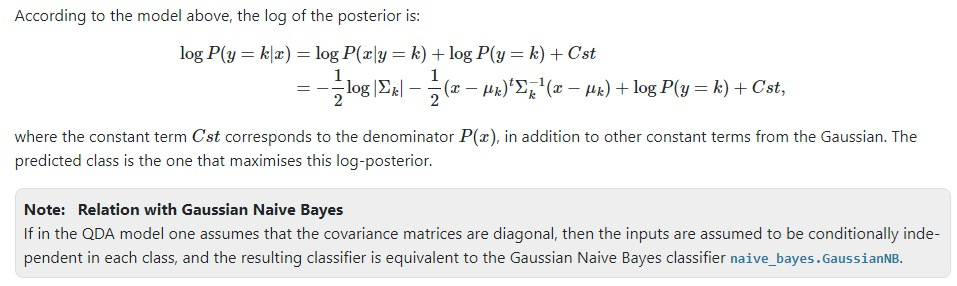

</br>

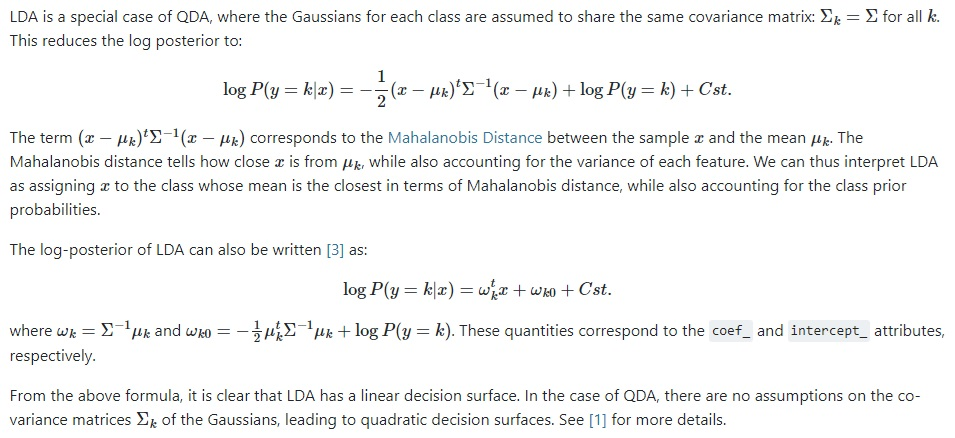

</br>

**Linear Discriminant Analysis:**

Linear Discriminant Analysis (LDA) is a method that is designed to separate two (or more) classes of observations based on a linear combination of features. The linear designation is the result of the discriminant functions  being linear. <a href="https://www.datasklr.com/select-classification-methods/linear-and-quadratic-discriminant-analysis">[1]</a>

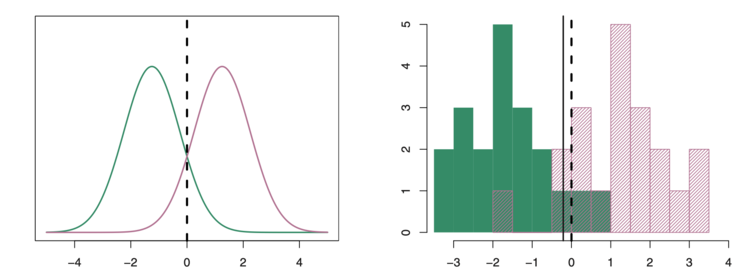

The image above shows two Gaussian density functions. (Source: Introduction to Statistical Learning - James et al.) Click for more.  The dashed vertical line shows the decision boundary.  The right side shows histograms of randomly chosen observations.  The dashed line again is the Bayesian decision boundary.  The solid  vertical line is the LDA decision boundary estimated from the training data.  When the Bayesian decision boundary and the LDA decision boundary are close, the model is considered to perform well. <a href="https://www.datasklr.com/select-classification-methods/linear-and-quadratic-discriminant-analysis">[1]</a>

LDA is used to estimate πkusing the proportion of the training observations that belong to the kth class. In this example there is only one regressor (p=the number of regressors). When multiple regressors are used, then observations are assumed to be drown from a multivariate Gaussian distribution.

**Quadratic Discriminant Analysis:**

Quadratic Discriminant Analysis (QDA) is similar to LDA based on the fact that there is an assumption of the observations being drawn form a normal distribution. The difference is that QDA assumes that each class has its own covariance matrix, while LDA does not.  <a href="https://www.datasklr.com/select-classification-methods/linear-and-quadratic-discriminant-analysis">[1]</a>

QDA classifier uses several parameters (Σk, μk, and π k) to determine in which class should an observation be classified. Whether we use QDA or LDA depends on the bias-variance tradeoff. LDA is less flexible with lower variance. However, in LDA, observations share a common covariance matrix, resulting in higher bias. <a href="https://www.datasklr.com/select-classification-methods/linear-and-quadratic-discriminant-analysis">[1]</a>



**Advantages**
*   LDA: It is simple, fast and portable algorithm. <a href="https://medium.com/analytics-vidhya/pros-and-cons-of-popular-supervised-learning-algorithms-d5b3b75d9218">[3]</a>
*   QDA: A flexible classification technique that allows for quadratic decision boundaries, leading to improved accuracy in capturing complex patterns. <a href="https://www.playerzero.ai/advanced/ai-terms-explained/quadratic-discriminant-analysis-ai-terms-explained">[4]</a>
*   QDA: It handles small-sized or imbalanced datasets effectively, making it suitable for challenging data scenarios. <a href="https://www.playerzero.ai/advanced/ai-terms-explained/quadratic-discriminant-analysis-ai-terms-explained">[4]</a>

**Disadvantages**
*   LDA: It requires normal distribution assumption on features/predictors. <a href="https://medium.com/analytics-vidhya/pros-and-cons-of-popular-supervised-learning-algorithms-d5b3b75d9218">[3]</a>
*   LDA: Sometimes not good for few categories variables. <a href="https://medium.com/analytics-vidhya/pros-and-cons-of-popular-supervised-learning-algorithms-d5b3b75d9218">[3]</a>
*   QDA: It assumes a Gaussian distribution for each class and is sensitive to outliers. Therefore, preprocessing techniques to handle outliers and data transformation methods may be required. <a href="https://www.playerzero.ai/advanced/ai-terms-explained/quadratic-discriminant-analysis-ai-terms-explained">[4]</a>
*   QDA: requires a sufficient amount of training data to estimate the covariance structure reliably. <a href="https://www.playerzero.ai/advanced/ai-terms-explained/quadratic-discriminant-analysis-ai-terms-explained">[4]</a>

<br/>

In [7]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
import random
from dsp import sine_wave, triangle_wave, square_wave, generate_class_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split


x, y = generate_class_data(wave_number=100)

# Normalize Data
x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

n_classes = int(np.amax(y_train)+1)
print("number of classes is ",n_classes)

number of classes is  3


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.200):
{'lda__covariance_estimator': None, 'lda__n_components': None, 'lda__priors': None, 'lda__shrinkage': None, 'lda__solver': 'svd', 'lda__store_covariance': False, 'lda__tol': 0.0001}
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76         8
         1.0       1.00      0.27      0.43        11
         2.0       0.79      1.00      0.88        11

    accuracy                           0.73        30
   macro avg       0.80      0.76      0.69        30
weighted avg       0.82      0.73      0.68        30



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.052):
{'qda__priors': None, 'qda__reg_param': 0.0, 'qda__store_covariance': False, 'qda__tol': 0.0001}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning:

Variables are collinear



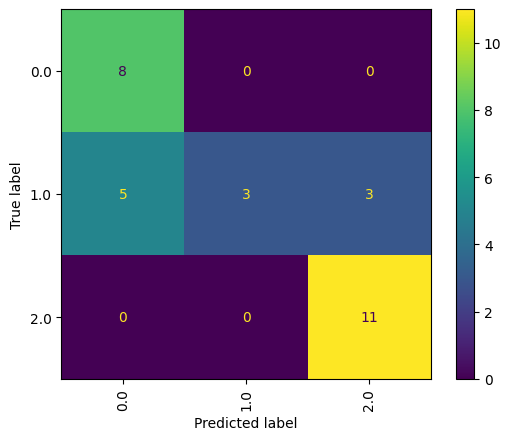

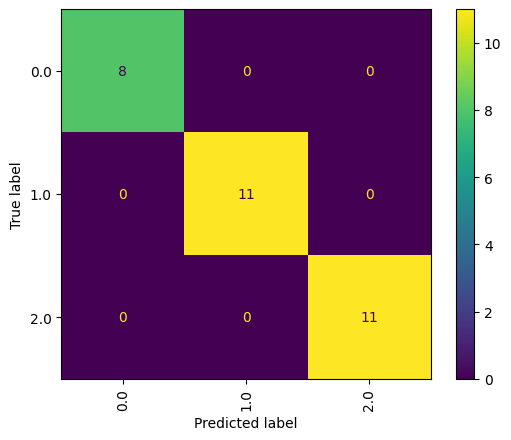

In [8]:
# SETUP & RUN LDA GRIDSEARCH TRAINING & TESTING

# import the classifier builder from the cloned python files
import sk_classifier_builder as skc
import sk_grid_builder as sgb

lda = skc.pipeBuild_LinearDiscriminantAnalysis()
qda = skc.pipeBuild_QuadraticDiscriminantAnalysis(priors=[None],reg_param=[0.0],store_covariance=[False],tol=[1.0e-4])

names=['Linear Discriminant Analysis','Quadratic Discriminant Analysis']
pipes=[lda,qda]


# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
sgb.gridsearch_classifier(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,plot_number=3)

## Decision Trees

### Decision Tree Classifier

From **SciKit Learn**.  See reference <a href="https://scikit-learn.org/stable/modules/tree.html https://www.datacamp.com/tutorial/decision-tree-classification-python">[1]</a>

Modified: **Stephen Coshatt** with more references and descriptions
</br></br>

**Refernece:**

1. https://scikit-learn.org/stable/modules/tree.html
2. https://www.datacamp.com/tutorial/decision-tree-classification-python

</br></br>

**Decision Trees (DTs)** are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation. <a href="https://scikit-learn.org/stable/modules/tree.html">[1]</a>

A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. <a href="https://www.datacamp.com/tutorial/decision-tree-classification-python">[2]</a>

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in a recursive manner called recursive partitioning. This flowchart-like structure helps you in decision-making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret. <a href="https://www.datacamp.com/tutorial/decision-tree-classification-python">[2]</a>

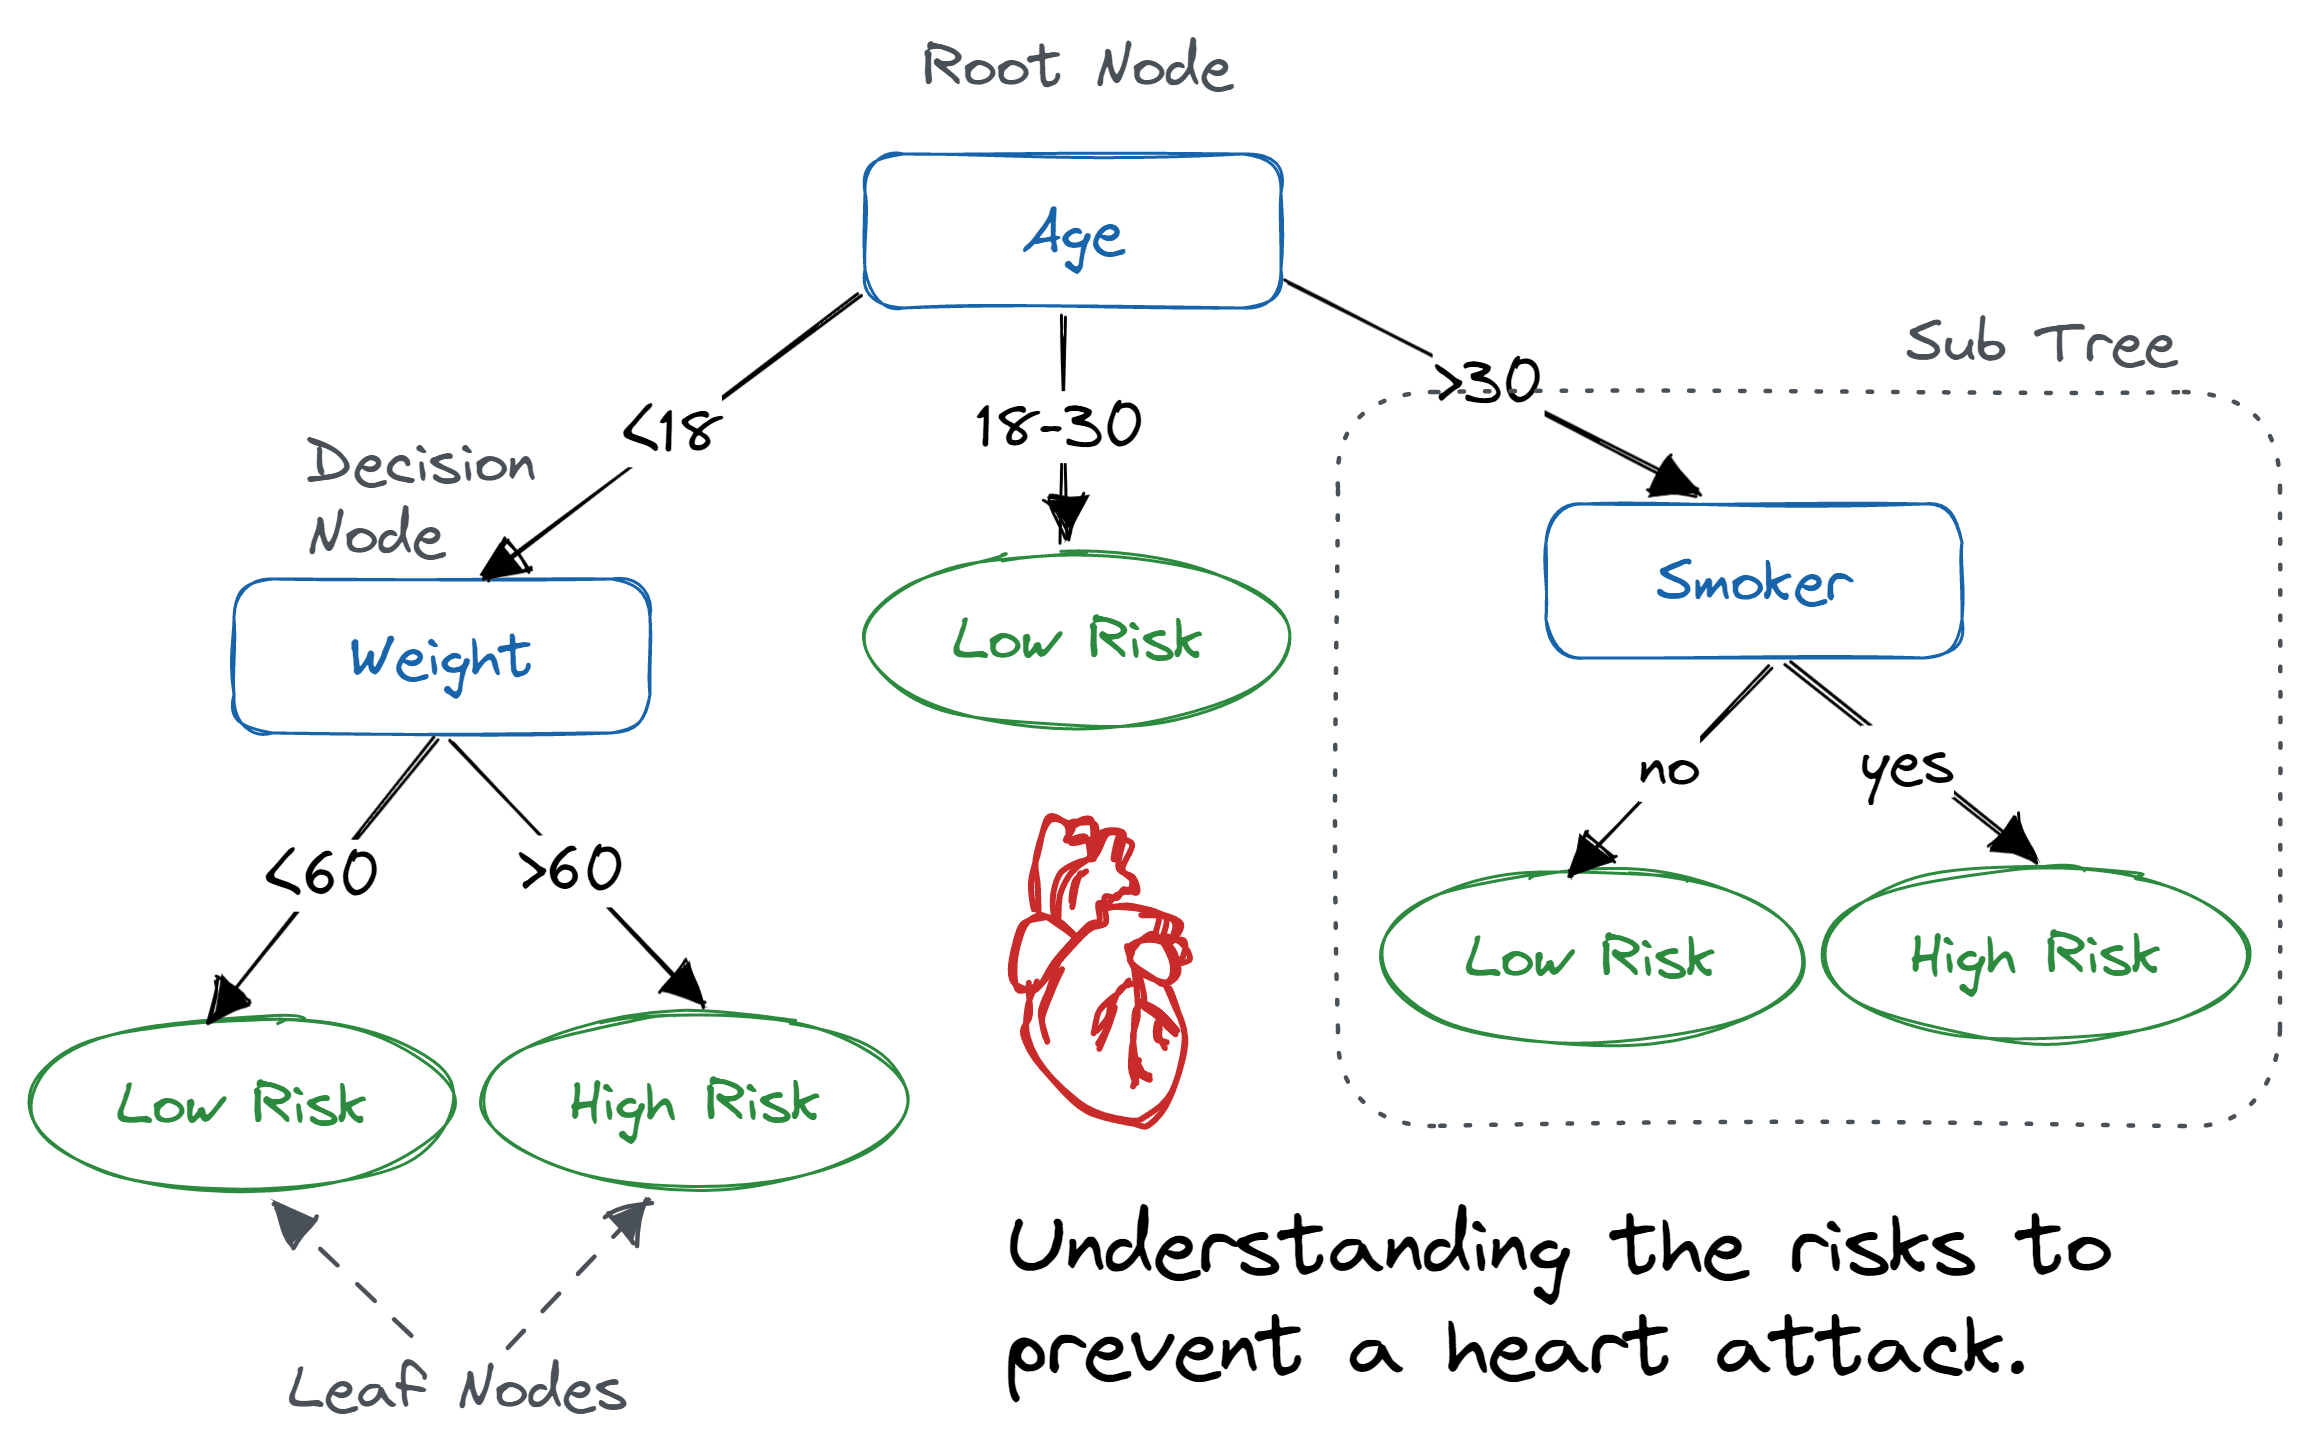

A decision tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as with a neural network. Its training time is faster compared to the neural network algorithm. <a href="https://www.datacamp.com/tutorial/decision-tree-classification-python">[2]</a>

The time complexity of decision trees is a function of the number of records and attributes in the given data. The decision tree is a distribution-free or non-parametric method which does not depend upon probability distribution assumptions. Decision trees can handle high-dimensional data with good accuracy. <a href="https://www.datacamp.com/tutorial/decision-tree-classification-python">[2]</a>

**How the Algoritm Works**

The basic idea behind any decision tree algorithm is as follows: <a href="https://www.datacamp.com/tutorial/decision-tree-classification-python">[2]</a>

1.  Select the best attribute using Attribute Selection Measures (ASM) to split the records. <a href="https://www.datacamp.com/tutorial/decision-tree-classification-python">[2]</a>
2.  Make that attribute a decision node and breaks the dataset into smaller subsets.
3.  Start tree building by repeating this process recursively for each child until one of the conditions will match: <a href="https://www.datacamp.com/tutorial/decision-tree-classification-python">[2]</a>
  *  All the tuples belong to the same attribute value. <a href="https://www.datacamp.com/tutorial/decision-tree-classification-python">[2]</a>
  *  There are no more remaining attributes. <a href="https://www.datacamp.com/tutorial/decision-tree-classification-python">[2]</a>
  *  There are no more instances. <a href="https://www.datacamp.com/tutorial/decision-tree-classification-python">[2]</a>

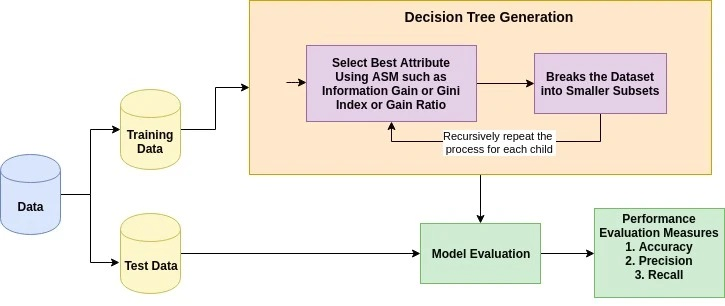

**Advantages:**

* Simple to understand and to interpret. Trees can be visualized. <a href="https://scikit-learn.org/stable/modules/tree.html">[1]</a>

* Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Some tree and algorithm combinations support missing values. <a href="https://scikit-learn.org/stable/modules/tree.html">[1]</a>

* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree. <a href="https://scikit-learn.org/stable/modules/tree.html">[1]</a>

* Able to handle both numerical and categorical data. However, the scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information. <a href="https://scikit-learn.org/stable/modules/tree.html">[1]</a>

* Able to handle multi-output problems. <a href="https://scikit-learn.org/stable/modules/tree.html">[1]</a>

* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret. <a href="https://scikit-learn.org/stable/modules/tree.html">[1]</a>

* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model. <a href="https://scikit-learn.org/stable/modules/tree.html">[1]</a>

* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated. <a href="https://scikit-learn.org/stable/modules/tree.html">[1]</a>

**Disadvantages:**

* Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem. <a href="https://scikit-learn.org/stable/modules/tree.html">[1]</a>

* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble. <a href="https://scikit-learn.org/stable/modules/tree.html">[1]</a>

* Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation. <a href="https://scikit-learn.org/stable/modules/tree.html">[1]</a>

* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement. <a href="https://scikit-learn.org/stable/modules/tree.html">[1]</a>

* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems. <a href="https://scikit-learn.org/stable/modules/tree.html">[1]</a>

* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree. <a href="https://scikit-learn.org/stable/modules/tree.html">[1]</a>

### Extra Trees Classifier

From: **Towards Data Science**

*Modified: Stephen Coshatt*

<br/>

**References:**

1.   https://towardsdatascience.com/what-when-how-extratrees-classifier-c939f905851c
2.   https://www.baeldung.com/cs/random-forest-vs-extremely-randomized-trees
3.   https://blog.tdg.international/exploring-extra-trees-82d1e87c302a


</br>

##What is ExtraTrees models?

Similar to Random Forests, ExtraTrees is an ensemble ML approach that trains numerous decision trees and aggregates the results from the group of decision trees to output a prediction. However, there are few differences between Extra Trees and Random Forest. <a href="https://towardsdatascience.com/what-when-how-extratrees-classifier-c939f905851c">[1]</a>

Random Forest uses bagging to select different variations of the training data to ensure decision trees are sufficiently different. However, Extra Trees uses the entire dataset to train decision trees. As such, to ensure sufficient differences between individual decision trees, it RANDOMLY SELECTS the values at which to split a feature and create child nodes. In contrast, in a Random Forest, we use an algorithm to greedy search and select the value at which to split a feature. Apart from these two differences, Random Forest and Extra Trees are largely the same. So what effect do these changes have? <a href="https://towardsdatascience.com/what-when-how-extratrees-classifier-c939f905851c">[1]</a>

* Using the entire dataset (which is the default setting and can be changed) allows ExtraTrees to reduce the bias of the model. However, the randomization of the feature value at which to split, increases the bias and variance. The paper that introduced the Extra Trees model conducts a bias-variance analysis of different tree based models. From the paper we see on most classification and regression tasks (six were analyzed) ExtraTrees have higher bias and lower variance than Random Forest. However, the paper goes on to say this is because the randomization in extra trees works to include irrelevant features into the model. As such, when irrelevant feature were excluded, say via a feature selection pre-modelling step, Extra Trees get a bias score similar to that of Random Forest. <a href="https://towardsdatascience.com/what-when-how-extratrees-classifier-c939f905851c">[1]</a>

* In terms of computational cost, Extra Trees is much faster than Random Forest. This is because Extra Trees randomly selects the value at which to split features, instead of the greedy algorithm used in Random Forest. <a href="https://towardsdatascience.com/what-when-how-extratrees-classifier-c939f905851c">[1]</a>

##When should you use ExtraTrees?

Random Forest remains the go-to ensemble tree based model (with recent competition from XGBoost Models). However, from our prior discussion on the differences between Random Forest and Extra Trees, we see that ExtraTrees have value, especially when computational cost is a concern. **Specifically, when building models that have substantial feature engineering/feature selection pre-modelling steps, and computational cost is an issue ExtraTrees would be a good choice over other ensemble tree-based models.** <a href="https://towardsdatascience.com/what-when-how-extratrees-classifier-c939f905851c">[1]</a>

##Parameters

* **K** is the max_feature in Scikit-learn documentation and refers to the number of features to be considered at each decision node. The higher the value of K, more features are considered at each decision node, and hence lower the bias of the model. However, too high a value of K reduces randomization, negating the effect of the ensemble.
* **nmin** maps to min_sample_leaf, and is a minimum number of samples required to be at a leaf node. The higher its value, the less likely the model is to overfit. Smaller numbers of samples result in more splits and a deeper, more specialized tree.
* **M** maps to n_estimators, and is a number of trees in the forest. The higher its value, the lower the variance of the model.

## Takeaways

* ExtraTrees Classifier is an ensemble tree-based machine learning approach that uses relies on randomization to reduce variance and computational cost (compared to Random Forest).
* ExtraTrees Classifier can be used for classification or regression, in scenarios where computational cost is a concern and features have been carefully selected and analyzed.
* Extra Trees can be implemented from Scikit-learn. The three hyperparameters important for tuning are max_feature, min_samples_leaf, and n_estimators.


###Advantages
*   Reduction in bias. This is in terms of sampling from the entire dataset during the construction of the trees. Different subsets of the data may introduce different biases in the results obtained, hence Extra Trees prevents this by sampling the entire dataset. <a href="https://www.baeldung.com/cs/random-forest-vs-extremely-randomized-trees">[2]</a> <a href="https://blog.tdg.international/exploring-extra-trees-82d1e87c302a">[3]</a>
*   Reduces Variance. This is a result of the randomized splitting of nodes within the decision trees, hence the algorithm is not heavily influenced by certain features or patterns in the dataset.  <a href="https://www.baeldung.com/cs/random-forest-vs-extremely-randomized-trees">[2]</a> <a href="https://blog.tdg.international/exploring-extra-trees-82d1e87c302a">[3]</a>
*   One of the key advantages of extra trees is their computational efficiency. <a href="https://blog.tdg.international/exploring-extra-trees-82d1e87c302a">[3]</a>
*   Robustness to Outliers and Noisy Data: Extra trees are less sensitive to outliers and noisy data, making them suitable for dealing with real-world datasets that often contain irregularities. <a href="https://blog.tdg.international/exploring-extra-trees-82d1e87c302a">[3]</a>
*   Extra trees are particularly effective in handling high-dimensional datasets. <a href="https://blog.tdg.international/exploring-extra-trees-82d1e87c302a">[3]</a>
*   Overfitting Prevention: Extra trees introduce additional randomness in the decision tree building process, which helps prevent overfitting and reduces model complexity. <a href="https://blog.tdg.international/exploring-extra-trees-82d1e87c302a">[3]</a>
*   Fast Training: The use of random feature thresholds and randomized feature subspace selection accelerates the training process, making extra trees faster to train compared to traditional decision trees. <a href="https://blog.tdg.international/exploring-extra-trees-82d1e87c302a">[3]</a>
*   High Accuracy: Despite their simplicity, extra trees can achieve high predictive accuracy, especially when trained on large datasets. <a href="https://blog.tdg.international/exploring-extra-trees-82d1e87c302a">[3]</a>

###Disadvantages
*   Less interpretable. Extra Trees introduces additional randomness by selecting random subsets of features and splitting the nodes using random thresholds. This randomness helps reduce overfitting and improves performance. However, it also makes the resulting model less interpretable. <a href="https://blog.tdg.international/exploring-extra-trees-82d1e87c302a">[3]</a>
*   Hyperparamater Tuning.  Small changes in parameters can lead to large changes in results <a href="https://blog.tdg.international/exploring-extra-trees-82d1e87c302a">[3]</a>

### Random Forests
From **Data Camp** and **Medium**.  See references <a href="https://www.datacamp.com/tutorial/random-forests-classifier-python">[1]</a> & <a href="https://medium.datadriveninvestor.com/random-forest-pros-and-cons-c1c42fb64f04">[2]</a>

Modified: **Stephen Coshatt** with more references and descriptions
</br></br>

**Refernece:**

1.   https://www.datacamp.com/tutorial/random-forests-classifier-python
2.   https://medium.datadriveninvestor.com/random-forest-pros-and-cons-c1c42fb64f04

</br></br>

**Random Forests** are a non-parametric supervised ensemble learning method used for classification and regression. A randomd forest uses an ensemble of dectision trees.

**How Random Forest Classification works**

Imagine you have a complex problem to solve, and you gather a group of experts from different fields to provide their input. Each expert provides their opinion based on their expertise and experience. Then, the experts would vote to arrive at a final decision. <a href="https://www.datacamp.com/tutorial/random-forests-classifier-python">[1]</a>

In a random forest classification, multiple decision trees are created using different random subsets of the data and features. Each decision tree is like an expert, providing its opinion on how to classify the data. Predictions are made by calculating the prediction for each decision tree, then taking the most popular result. (For regression, predictions use an averaging technique instead.) <a href="https://www.datacamp.com/tutorial/random-forests-classifier-python">[1]</a>

In the diagram below, we have a random forest with n decision trees, and we’ve shown the first 5, along with their predictions (either “Dog” or “Cat”). Each tree is exposed to a different number of features and a different sample of the original dataset, and as such, every tree can be different. Each tree makes a prediction. Looking at the first 5 trees, we can see that 4/5 predicted the sample was a Cat. The green circles indicate a hypothetical path the tree took to reach its decision. The random forest would count the number of predictions from decision trees for Cat and for Dog, and choose the most popular prediction. <a href="https://www.datacamp.com/tutorial/random-forests-classifier-python">[1]</a>

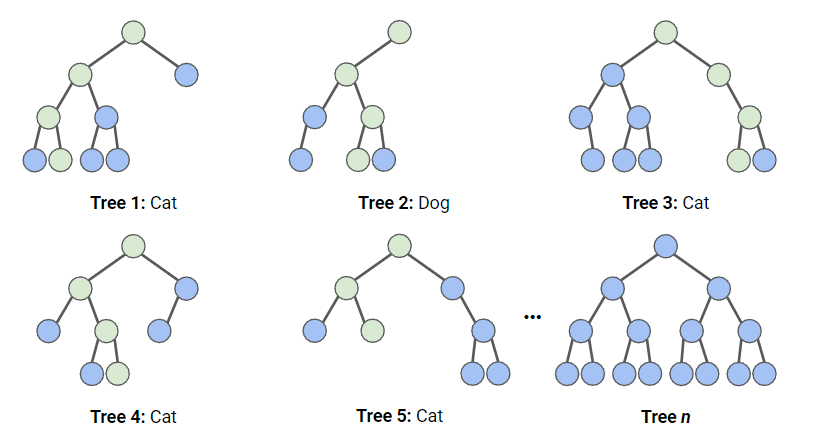

**Advantages:**

* Random Forests can be used for both classification and regression tasks. <a href="https://medium.datadriveninvestor.com/random-forest-pros-and-cons-c1c42fb64f04">[2]</a>
* Random Forests work well with both categorical and numerical data. No scaling or transformation of variables is usually necessary. <a href="https://medium.datadriveninvestor.com/random-forest-pros-and-cons-c1c42fb64f04">[2]</a>
* Random Forests implicitly perform feature selection and generate uncorrelated decision trees. It does this by choosing a random set of features to build each decision tree. This also makes it a great model when you have to work with a high number of features in the data. <a href="https://medium.datadriveninvestor.com/random-forest-pros-and-cons-c1c42fb64f04">[2]</a>
* Random Forests are not influenced by outliers to a fair degree. It does this by binning the variables. <a href="https://medium.datadriveninvestor.com/random-forest-pros-and-cons-c1c42fb64f04">[2]</a>
* Random Forests can handle linear and non-linear relationships well. <a href="https://medium.datadriveninvestor.com/random-forest-pros-and-cons-c1c42fb64f04">[2]</a>
* Random Forests generally provide high accuracy and balance the bias-variance trade-off well. Since the model's principle is to average the results across the multiple decision trees it builds, it averages the variance as well. <a href="https://medium.datadriveninvestor.com/random-forest-pros-and-cons-c1c42fb64f04">[2]</a>

**Disadvantages:**

* Random Forests are not easily interpretable. They provide feature importance but it does not provide complete visibility into the coefficients as linear regression. <a href="https://medium.datadriveninvestor.com/random-forest-pros-and-cons-c1c42fb64f04">[2]</a>
* Random Forests can be computationally intensive for large datasets. <a href="https://medium.datadriveninvestor.com/random-forest-pros-and-cons-c1c42fb64f04">[2]</a>
* Random forest is like a black box algorithm, you have very little control over what the model does. <a href="https://medium.datadriveninvestor.com/random-forest-pros-and-cons-c1c42fb64f04">[2]</a>





In [9]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
import random
from dsp import sine_wave, triangle_wave, square_wave, generate_class_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split


x, y = generate_class_data(wave_number=100)

# Normalize Data
x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

n_classes = int(np.amax(y_train)+1)
print("number of classes is ",n_classes)

number of classes is  3


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameter (CV score=-0.019):
{'decision__criterion': 'entropy', 'decision__max_depth': 5, 'decision__splitter': 'best'}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=0.000):
{'extra__criterion': 'gini', 'extra__max_depth': None, 'extra__max_features': 'sqrt', 'extra__min_samples_leaf': 1, 'extra__min_samples_split': 2, 'extra__n_estimators': 100}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameter (CV score=-0.052):
{'random__criterion': 'entropy', 'random__max_depth': 10, 'random__max_features': 1, 'random__n_estimators': 10}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



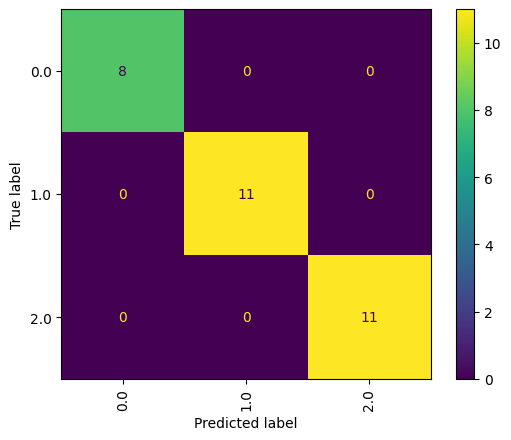

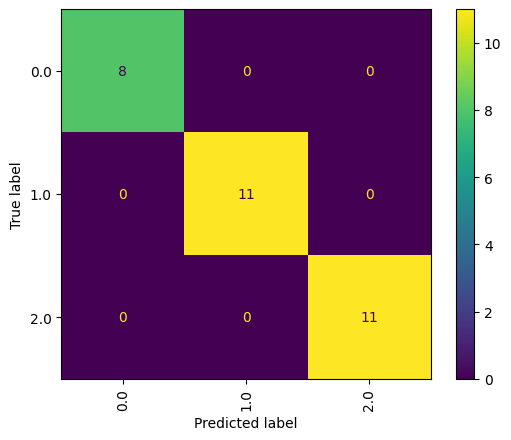

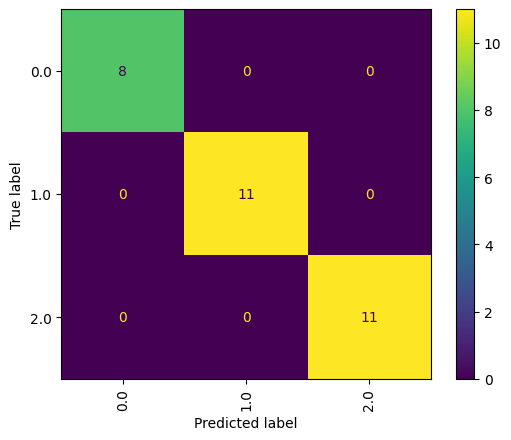

In [10]:
# SETUP & RUN A TREES GRIDSEARCH TRAINING & TESTING

# import the classifier builders from the cloned python files
import sk_classifier_builder as skc
import sk_grid_builder as sgb

decision_tree = skc.pipeBuild_DecisionTreeClassifier(criterion=['gini','entropy'],max_depth=[5, 10])
xtree = skc.pipeBuild_ExtraTreesClassifier()
random_forest = skc.pipeBuild_RandomForestClassifier(criterion=['gini','entropy'],n_estimators=[10], max_depth=[3, 5, 10],max_features=[1])

names=['Decision Tree','Extra Trees','Random Forest']
pipes=[decision_tree,xtree,random_forest]

# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
sgb.gridsearch_classifier(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,plot_number=3)

## Nearest Neighbors

This section discusses Classification Algorithms Based on Neighbors:  KNN, Nearest Centroid, and Radius Neighbors

### K Nearest Neighbors

*Author: Soumya Pal*

*Updated: Stephen Coshatt*

<br/>

**References:**


1.   https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
2.   https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
3.  https://www.geeksforgeeks.org/ml-nearest-centroid-classifier/
4.  https://machinelearningmastery.com/radius-neighbors-classifier-algorithm-with-python/

**K-Nearest Neighbors (kNN) [Supervised]**

"The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems." [1]

kNN algorithm, often abbreviated k-nn, is an approach to data classification that estimates how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in.

"The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other." [1]

**The KNN Algorithm  [1]**

1.  Load the data
2.  Initialize K to your chosen number of neighbors
3.  For each example in the data
    <ol>
      <li>Calculate the distance between the query example and the current example from the data.</li>
      <li>Add the distance and the index of the example to an ordered collection</li>
    </ol>
4.  Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5.  Pick the first K entries from the sorted collection
6.  Get the labels of the selected K entries
7.  If regression, return the mean of the K labels
8.  If classification, return the mode of the K labels

**Choosing the right value for K**

To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before. [1]

Here are some things to keep in mind:


1.   As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green. [1]
2.   Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far. [1]
3.   In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker. [1]


**Advantages**
*   No Training Period: KNN is called Lazy Learner (Instance based learning). It does not learn anything in the training period or derive any discriminative function from the training data. In other words, there is no training period for it. It stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc.
*   Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm.
*   KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)
*   Can be used both for Classification and Regression: One of the biggest advantages of K-NN is that K-NN can be used both for classification and regression problems.

**Disadvantages**
*   Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing point is huge which degrades the performance of the algorithm.
*   Does not work well with high dimensions: The KNN algorithm doesn't work well with high dimensional data because with a large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.
*   Requires feature scaling: Feature scaling (standardization and normalization) has to be done before applying KNN algorithm to any dataset, otherwise KNN may generate wrong predictions.
*   Sensitive to noisy data, missing values and outliers: KNN is sensitive to noise in the dataset. So data has to be manipulated to impute missing values and remove outliers.

###Nearest Centroid Classifier

The Nearest Centroid (NC) Classifier is one of the most underrated and underutilised classifiers in Machine Learning. However, it is quite powerful and is highly efficient for certain Machine Learning classification tasks. The Nearest Centroid classifier is somewhat similar to the K-Nearest Neighbours classifier. [3]

An often-overlooked principle in Machine Learning is to build simple algorithms off of simple, yet meaningful data, that can do specific tasks efficiently, instead of using complex models. This is also called the principle of sufficiency in statistics. The Nearest Centroid classifier is arguably the simplest Classification algorithm in Machine Learning. The Nearest Centroid classifier works on a simple principle : Given a data point (observation), the Nearest Centroid classifier simply assign it the label (class) of the training sample whose mean or centroid is closest to it.
When applied on text classification, the Nearest Centroid classifier is also called the Rocchio classifier. The scikit-learn library in Python offers a simple function to implement the Nearest Centroid Classifier.

**How the nearest centroid classifier works?**

Basically, what the nearest centroid classifier does can be explained in three steps: [3]

* The centroid for each target class is computed while training.
* After training, given any point, say 'X'. The distances between the point X and each class' centroid is calculated. [3]
* Out of all the calculated distances, the minimum distance is picked. The centroid to which the given point's distance is minimum, it's class is assigned to the given point. [3]

The Nearest Centroid Classifier is quite easy to understand and is one of the simplest classifier algorithms. [3]

###Radius Neighbors Classifier

Radius Neighbors is an extension to the k-nearest neighbors algorithm that makes predictions using all examples in the radius of a new example rather than the k-closest neighbors. [4]

As such, the radius-based approach to selecting neighbors is more appropriate for sparse data, preventing examples that are far away in the feature space from contributing to a prediction. [4]

### Time Series KNN

The Time Series KNN is a version of the KNN modified to better handle time series data by TS Learn.

In [11]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
import random
from dsp import sine_wave, triangle_wave, square_wave, generate_class_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split


x, y = generate_class_data(wave_number=100)

# Normalize Data
x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

n_classes = int(np.amax(y_train)+1)
print("number of classes is ",n_classes)

number of classes is  3


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameter (CV score=-0.759):
{'knn__algorithm': 'auto', 'knn__leaf_size': 20, 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
              precision    recall  f1-score   support

         0.0       0.67      0.50      0.57         8
         1.0       1.00      1.00      1.00        11
         2.0       0.69      0.82      0.75        11

    accuracy                           0.80        30
   macro avg       0.79      0.77      0.77        30
weighted avg       0.80      0.80      0.79        30



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.804):
{'nc__metric': 'euclidean', 'nc__shrink_threshold': None}
              precision    recall  f1-score   support

         0.0       0.62      0.62      0.62         8
         1.0       1.00      1.00      1.00        11
         2.0       0.73      0.73      0.73        11

    accuracy                           0.80        30
   macro avg       0.78      0.78      0.78        30
weighted avg       0.80      0.80      0.80        30



Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning:

One or more of the test scores are non-finite: [nan]



ValueError: No neighbors found for test samples array([ 5,  6,  7, 16, 18, 19, 23, 25, 27, 28, 29]), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.

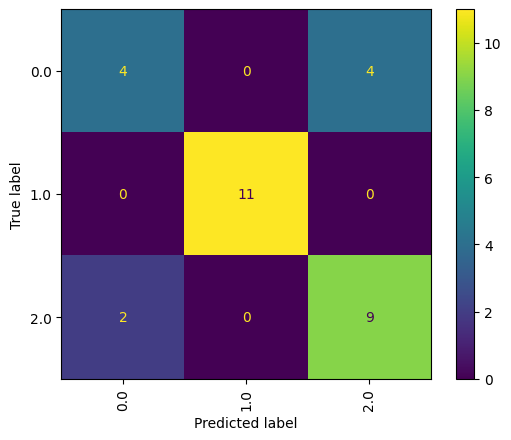

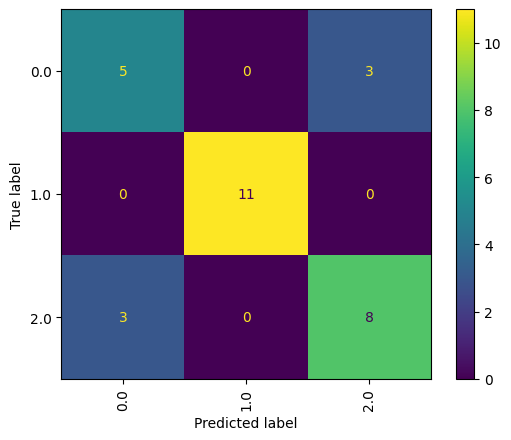

In [12]:
# SETUP & RUN A NEAREST NEIGHBORS GRIDSEARCH TRAINING & TESTING

# import the classifier builders from the cloned python files
import sk_classifier_builder as skc
import sk_grid_builder as sgb

knn = skc.pipeBuild_KNeighborsClassifier(n_neighbors=[3,5],weights=['uniform'],algorithm=['auto'],leaf_size=[20,30])
ncent = skc.pipeBuild_NearestCentroid()
rad = skc.pipeBuild_RadiusNeighborsClassifier(radius=[10])
tsknn = skc.pipeBuild_KNeighborsTimeSeriesClassifier(n_neighbors=[3,5,10],weights=['uniform','distance'],metric=['dtw','softdtw','ctw','euclidean','sqeuclidean','cityblock','sax'])

names=['K Nearest Neighbors','Nearest Centroid','Radius Neighbors','Time Series KNN']
pipes=[knn,ncent,rad,tsknn]

# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
sgb.gridsearch_classifier(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,plot_number=3)

## Non-Myopic Early Classifier

**References:**

1.   https://ieeexplore.ieee.org/document/9066213
2.   https://tslearn.readthedocs.io/en/stable/auto_examples/classification/plot_early_classification.html#sphx-glr-auto-examples-classification-plot-early-classification-py
3.   https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.205.2478&rep=rep1&type=pdf
4.   https://arxiv.org/ftp/arxiv/papers/2102/2102.11487.pdf

"The aim of early classification is to analyse the sequence data at each time point continuously and predict the class label when a sufficient amount of data is available. Thus, the decision of early classification is a challenging task that needs to be addressed." [1]

Early Classification on Time Series is "an effective 1-nearest neighbor classification method which makes prediction early and at the same time retains an accuracy comparable to that of a 1NN classifier using the full-length time series." [3]

"The problem is expressed differently by different researchers, but it generally reduced to asking if we can classify a time series subsequence with sufficient accuracy and confidence after seeing only some prefix of a target pattern." [4]

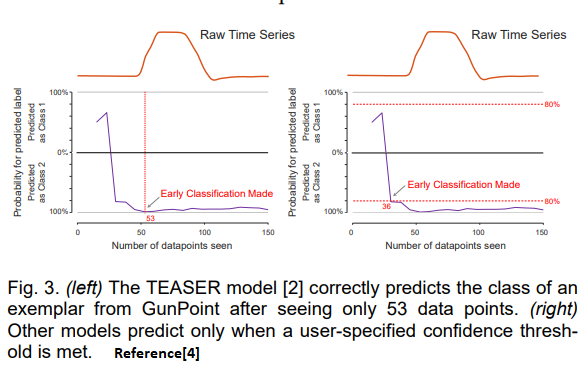


**Pros:**


*   Via ECTS, "classification without waiting for the entire pattern to appear would allow us to take immediate action in a domain in which some interventions are possible." [4]



**Cons:**


*   Can be "Disconnect to the Real World." [4].  It may not accurately represent the real world or may not be practical in some real world cases.
*   "ETSC is much harder than it appears." [4]
*   "Domains where ETSC could be meaningfully applied is vanishingly small" [4] due to:
  *   "**The prefix problem** is the assumption that the pattern to be early classified is not a prefix of a longer innocuous pattern." [4]
  *   "**The inclusion problem** is the assumption that the pattern to be early classified is not comprised of smaller atomic units that are frequently observed on their own." [4]
  *   "**The homophone problem** is the assumption that two semantically different events will have different shapes in the time series representation." [4]
*   Susceptible to "cheating" by "peeking into the future." [4]
*   "Difficult to find data sets that make sense for ECTS." [4]




In [13]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
import random
from dsp import sine_wave, triangle_wave, square_wave, generate_class_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split


x, y = generate_class_data(wave_number=30)

# Normalize Data
x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

n_classes = int(np.amax(y_train)+1)
print("number of classes is ",n_classes)

number of classes is  3


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fi

Best parameter (CV score=nan):
{'early__base_classifier': None, 'early__cost_time_parameter': 1.0, 'early__lamb': 1.0, 'early__min_t': 1, 'early__n_clusters': 3}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      0.80      0.89         5
         2.0       0.67      1.00      0.80         2

    accuracy                           0.89         9
   macro avg       0.89      0.93      0.90         9
weighted avg       0.93      0.89      0.89         9



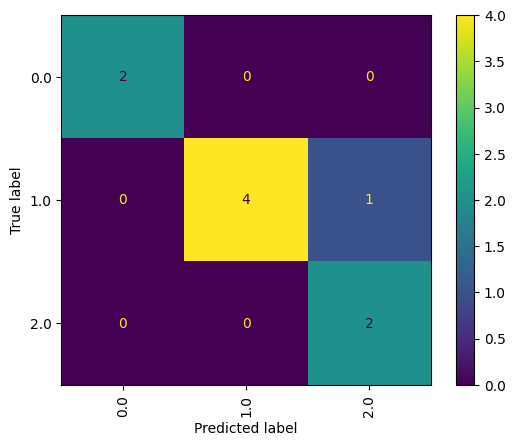

In [14]:
# SETUP & RUN AN EARLY CLASSIFIER GRIDSEARCH TRAINING & TESTING

# import the classifier builders from the cloned python files
import sk_classifier_builder as skc
import sk_grid_builder as sgb

early = skc.pipeBuild_NonMyopicEarlyClassifier(n_clusters=[n_classes])

names=['Non-Myopic Early']
pipes=[early]

# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
sgb.gridsearch_classifier(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,plot_number=3)

## Support Vector Classifiers

From **Avinash Navlani's Tutorial**.  See reference [1]

Updated: **Stephen Coshatt** with more references and descriptions
</br></br>

**Refernece:**

1.   https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
2.   https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
3.  https://data-flair.training/blogs/svm-kernel-functions/
4.  https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496
5.  https://tslearn.readthedocs.io/en/stable/user_guide/kernel.html
6.  https://marcocuturi.net/GA.html
7.  https://dataaspirant.com/svm-kernels/#t-1608054630730

</br></br>

"Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes." [1]

**Support Vectors**
"Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier." [1]

**Hyperplane**
"A hyperplane is a decision plane which separates between a set of objects having different class memberships." [1]

**Margin**
"A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin." [1]


**How does SVM work?**
"The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure." [1]

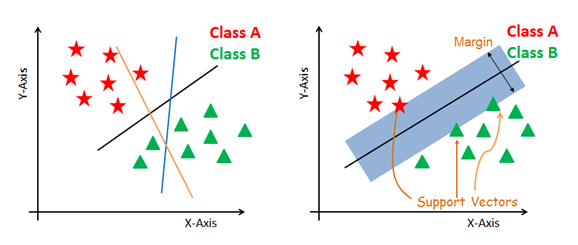

**Dealing with non-linear and inseparable planes**
"Some problems can’t be solved using linear hyperplane, as shown in the figure below (left-hand side)." [1]

"In such situation, SVM uses a kernel trick to transform the input space to a higher dimensional space as shown on the right. The data points are plotted on the x-axis and z-axis (Z is the squared sum of both x and y: z=x^2=y^2). Now you can easily segregate these points using linear separation." [1]

**SVM Kernels:**
"The function of kernel is to take data as input and transform it into the required form." [3]  "The SVM algorithm is implemented in practice using a kernel. ... SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier." [1]

1.  **Linear Kernel:**
"A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values." [1]  "In the linearly separable case, SVM is trying to find the hyperplane that maximizes the margin, with the condition that both classes are classified correctly," (100% correct classification). [3]

    **K(x, xi) = sum(x * xi)**

    "But in reality, datasets are probably never linearly separable, so the condition of 100% correctly classified by a hyperplane will never be met." [3]

    The linear kernel is mostly preferred for text-classification problems as most of these kinds of classification problems can be linearly separated. [7]

    **Kernel Trick:** try to find a non-linear decision boundary [3].  What Kernel Trick does is it utilizes existing features, applies some transformations, and creates new features. Those new features are the key for SVM to find the nonlinear decision boundary. [4]

2.  **Polynomial Kernel:**
"A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space." [1]

    **K(x,xi) = 1 + sum(x * xi)^d**

    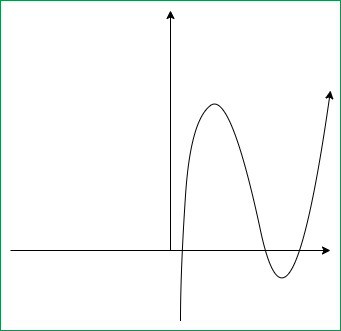

    "Where d is the degree of the polynomial. d=1 is similar to the linear transformation. The degree needs to be manually specified in the learning algorithm." [1]

    This kernel is popular in image processing. [3]  It is a more generalized representation of the linear kernel. Outside of this, it is not as preferred as other kernel functions as it is less efficient and accurate. [7]

3.  **Gaussian Radial Basis Function Kernel (RBF):**
"The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space." [1]

    **K(x,xi) = exp(-gamma * sum((x – xi^2))**

    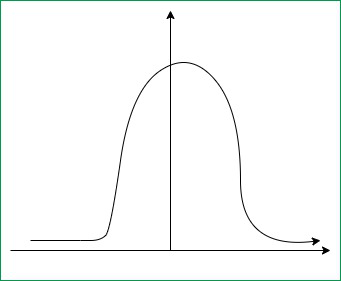

    "Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm." [1]

    It is a general-purpose kernel; used when there is no prior knowledge about the data. [3]  "It is one of the most preferred and used kernel functions in svm. It is usually chosen for non-linear data. It helps to make proper separation when there is no prior knowledge of data." [7]

4.  **Sigmoid Kernel:** [7]
It is mostly preferred for neural networks. This kernel function is similar to a two-layer perceptron model of the neural network, which works as an activation function for neurons. [7]

    It can be shown as:

    **F(x, xj) = tanh(αxay + c)**

    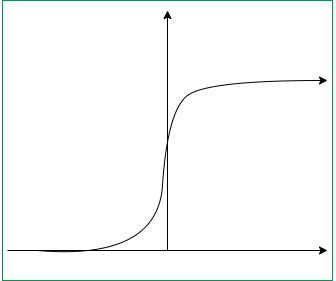

    Often used as the activation function for neural networks. [3]

5.  **Global Alignment Kernel (GAK):** [5]
The Global Alignment Kernel (GAK) is a kernel that operates on time series.

    It is defined, for a given bandwidth **σ**, as:

    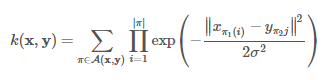

    where **A(x,y)** is the set of all possible alignments between series **x** and **y**.

    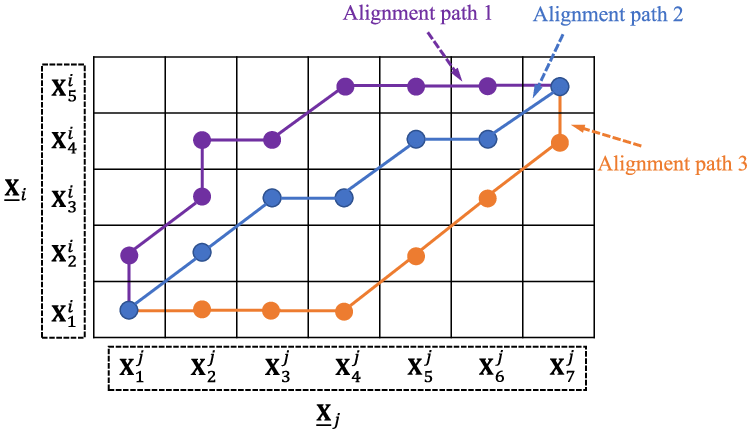

    It is advised in to set the bandwidth **σ** as a multiple of a simple estimate of the median distance of different points observed in different time-series of your training set, scaled by the square root of the median length of time-series in the set.

    In kernel methods, both large and small similarities matter, since they all contribute to the Gram matrix. Global Alignment (GA) kernels, which are positive definite, seem to do a better job of quantifying all similarities coherently, because they consider all possible alignments. [6]

    Note: This kernel is much slower than the other kernels


### Support Vector Classifier

This is the classic SV classification approach

### Nu Support Vector Classifier

"NuSVC() is similar to SVC(), except NuSVC() provides the ability to specify the number of vectors via the ‘nu’ parameter, which is a value from 0 to 1 representing the quotient of penalty over the number of vectors."

**Ref:**  https://antonhaugen.medium.com/intro-to-support-vector-machines-2bfbfec6517a

### Time Series Support Vector Classifier

This is a variation of of the class SVC modified for time series data and is part of the TS Learn library: https://tslearn.readthedocs.io/en/stable/gen_modules/svm/tslearn.svm.TimeSeriesSVC.html

In [15]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
import random
from dsp import sine_wave, triangle_wave, square_wave, generate_class_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split


x, y = generate_class_data(wave_number=100)

# Normalize Data
x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

n_classes = int(np.amax(y_train)+1)
print("number of classes is ",n_classes)

number of classes is  3


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.504):
{'svc__C': 1.0, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__tol': 0.001}
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88         8
         1.0       1.00      1.00      1.00        11
         2.0       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.237):
{'nusvc__degree': 3, 'nusvc__gamma': 'scale', 'nusvc__kernel': 'rbf', 'nusvc__nu': 0.5, 'nusvc__tol': 0.001}
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       1.00      1.00      1.00        11
         2.0       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameter (CV score=-0.030):
{'tssvc__C': 1.0, 'tssvc__cache_size': 200, 'tssvc__class_weight': None, 'tssvc__coef0': 0.0, 'tssvc__decision_function_shape': 'ovr', 'tssvc__degree': 3, 'tssvc__gamma': 'auto', 'tssvc__kernel': 'linear', 'tssvc__max_iter': -1, 'tssvc__n_jobs': None, 'tssvc__probability': False, 'tssvc__tol': 0.001, 'tssvc__verbose': 0}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



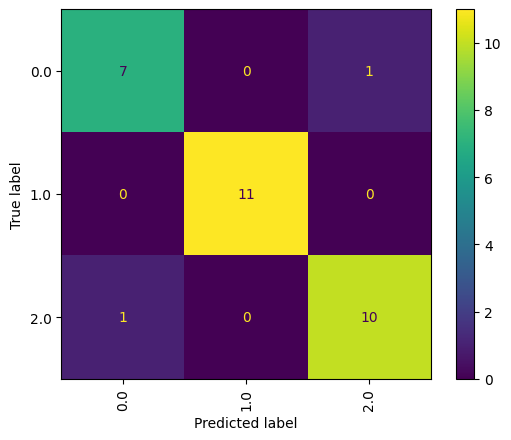

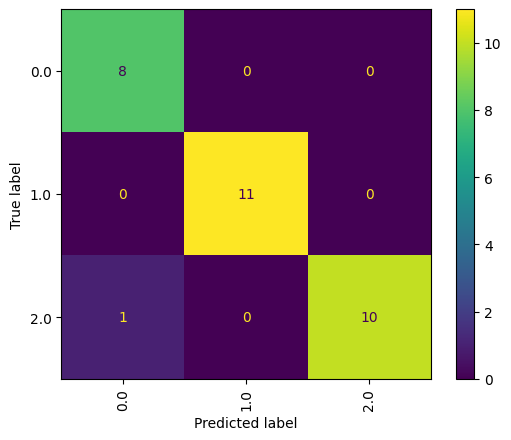

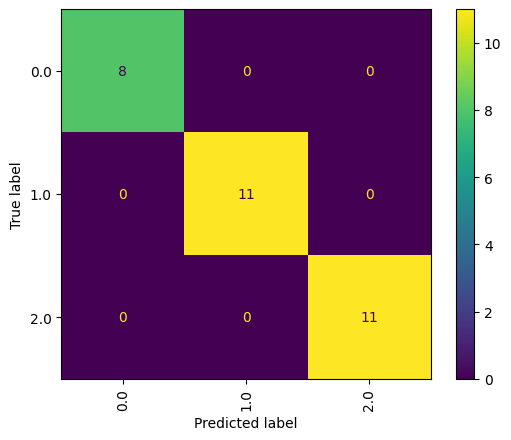

In [16]:
# SETUP & RUN AN SVC GRIDSEARCH TRAINING & TESTING

# import the classifier builders from the cloned python files
import sk_classifier_builder as skc
import sk_grid_builder as sgb

svc = skc.pipeBuild_SVC(C=[1.0],kernel=['rbf'],degree=[3],gamma=['scale'],tol=[1.0e-3],random_state=None)
nusvc = skc.pipeBuild_NuSVC(nu=[0.5],kernel=['rbf'],degree=[3],gamma=['scale'],tol=[1.0e-3],random_state=None)
tssvc = skc.pipeBuild_TimeSeriesSVC(kernel=['linear', 'poly', 'rbf', 'sigmoid'])

names=['SVClassifier','Nu-SVClassifier','Time Series SVC']
pipes=[svc,nusvc,tssvc]

# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
sgb.gridsearch_classifier(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,plot_number=3)

## Bagging & Boosting

**Tree-based ensemble algorithms**
Ensemble algorithms and particularly those that utilize decision trees as weak learners have multiple advantages compared to other algorithms (based on this paper, this one and this one):
1.  Their algorithms are easy to understand and visualize: describing and sketching a decision tree is arguably easier than describing Support Vector Machines to your grandma
2.  They are non-parametric and don’t assume or require the data to follow a particular distribution: this will save you time transforming data to be normally distributed
3.  They can handle mixed data types: categorical variables do not necessarily have to be one hot encoded
4.  Multi-collinearity of features does not affect the accuracy and prediction performance of the model: features do not need to be removed or otherwise engineered to decrease the correlations and interactions between them
5.  They are robust against overfitting: because they use many weak learners that underfit (high bias) and combine those predictions into a stronger learner, they reduce the overfitting (variance) of the model
6.  They are relatively robust against outliers and noise: in general, they will handle noisy data (e.g. features with no effect on the target) or outliers (e.g. extreme values) well with little effect on the overall performance (this point is debated for AdaBoost; more on that below)
7.  Inputs do not need to be scaled: preprocessing and transforming the features with MinMaxScaler or StandardScaler are not necessary
8.  They are computationally relatively inexpensive: compared to algorithms such as Support Vector Machines or neural networks they are faster
9.  They usually perform much better than their weak learners: decision trees will be less accurate due to their high variance/overfitting compared with boosting and bagging algorithms

### **Boosting & Bagging:**
"The concepts of boosting and bagging are central to understanding these tree-based ensemble models. **Boosting** describes the combination of many weak learners into one very accurate prediction algorithm. A weak learner refers to a learning algorithm that only predicts slightly better than randomly. When looking at tree-based ensemble algorithms a single decision tree would be the weak learner and the combination of multiple of these would result in the AdaBoost algorithm, for example. The boosting approach is a sequential algorithm that makes predictions for T rounds on the entire training sample and iteratively improves the performance of the boosting algorithm with the information from the prior round’s prediction accuracy (see this paper and this Medium blog post for further details)." [1]

"**Bagging** on the other hand refers to non-sequential learning. For T rounds, a random subset of samples is drawn (with replacement) from the training sample. Each of these draws are independent of the previous round’s draw but have the same distribution. These randomly selected samples are then used to grow a decision tree (weak learner). The most popular class (or average prediction value in case of regression problems) is then chosen as the final prediction value. The bagging approach is also called bootstrapping (see this and this paper for more details)." [1]

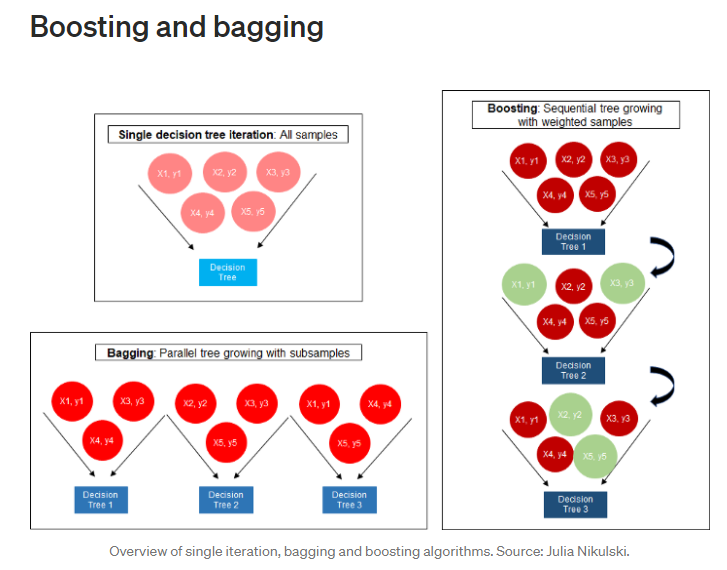


### AdaBoost

The AdaBoost algorithm is part of the family of boosting algorithms and was first introduced by Freund & Schapire in 1996. It is sequentially growing decision trees as weak learners and punishing incorrectly predicted samples by assigning a larger weight to them after each round of prediction. This way, the algorithm is learning from previous mistakes. The final prediction is the weighted majority vote (or weighted median in case of regression problems).
The pseudo code of the AdaBoost algorithm for a classification problem is shown below adapted from Freund & Schapire in 1996 (for regression problems, please refer to the underlying paper):

**For t in T rounds:** [1]
1.  Calculate distribution p by normalizing the weight vector w (the initial weights in w for the first round are 1/N, where N represents the number of labeled examples)
2.  Grow a weak learner (decision tree) using the distribution p; return hypothesis h with prediction values for each example
3.  Calculate error term ε of h
4.  Assign β with ε/(1- ε)
5.  Update the weight vector to w = w*β so that predictions with poor performance will have higher a weight and predictions with better performance will have a lower weight
**Output:** final hypothesis is the result of a weighted majority vote of all T weak learners

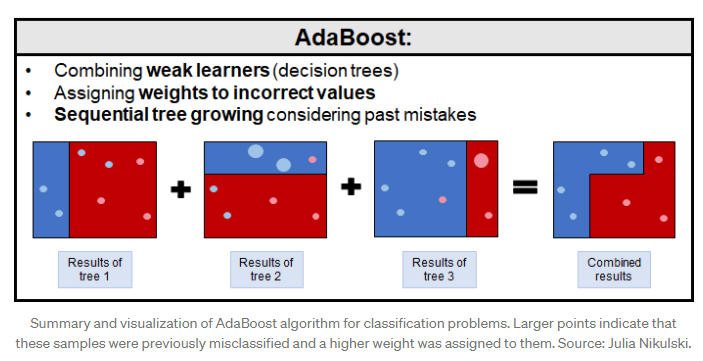

**Pros:** [1]
1.  AdaBoost is relatively robust to overfitting in low noise datasets (refer to Rätsch et al. (2001)).
2.  AdaBoost has only a few hyperparameters that need to be tuned to improve model performance.
3.  Moreover, this algorithm is easy to understand and to visualize.

**Cons:** [1]
1.  For noisy data the performance of AdaBoost is debated with some arguing that it generalizes well, while others show that noisy data leads to poor performance due to the algorithm spending too much time on learning extreme cases and skewing results.
2.  Compared to random forests and XGBoost, AdaBoost performs worse when irrelevant features are included in the model as shown by my time series analysis of bike sharing demand.
3.  AdaBoost is not optimized for speed, therefore being significantly slower than XGBoost.

"The relevant hyperparameters to tune are limited to the maximum depth of the weak learners/decision trees, the learning rate and the number of iterations/rounds. The learning rate balances the influence of each decision tree on the overall algorithm, while the maximum depth ensures that samples are not memorized, but that the model will generalize well with new data.
The above information shows that AdaBoost is best used in a dataset with low noise, when computational complexity or timeliness of results is not a main concern and when there are not enough resources for broader hyperparameter tuning due to lack of time and knowledge of the user." [1]

### Bagging Classification

From: **Geeks for Geeks**

*Modified: Stephen Coshatt*

<br/>

**References:**

1.   https://www.geeksforgeeks.org/ml-bagging-classifier/
2.   https://www.researchgate.net/figure/Pros-and-cons-of-bagging-and-boosting_tbl3_272864141
3.   https://datatrained.com/post/bagging-and-boosting/

</br>

In machine learning, for building solid and reliable models prediction accuracy is the key factor. Ensemble learning is a supervised machine-learning technique that combines multiple models to build a more powerful and robust model. The idea is that by combining the strengths of multiple models, we can create a model that is more robust and less likely to overfit the data. It can be used for both classifications and regression tasks. [1]

Ensemble learning techniques can be categorized in three ways:

1. Bagging (Bootstrap Aggregating)
2. Boosting
3. Stacking (Stacked Generalization)

Bagging is a supervised machine-learning technique, and it can be used for both regression and classification tasks, In this article we will discuss the bagging classifier.


##Bagging Classifier

Bagging (or Bootstrap aggregating) is a type of ensemble learning in which multiple base models are trained independently in parallel on different subsets of the training data. Each subset is generated using bootstrap sampling, in which data points are picked at random with replacement. In the case of the Bagging classifier, the final prediction is made by aggregating the predictions of the all-base model, using majority voting. In the case of regression, the final prediction is made by averaging the predictions of the all-base model, and that is known as bagging regression.

</br>

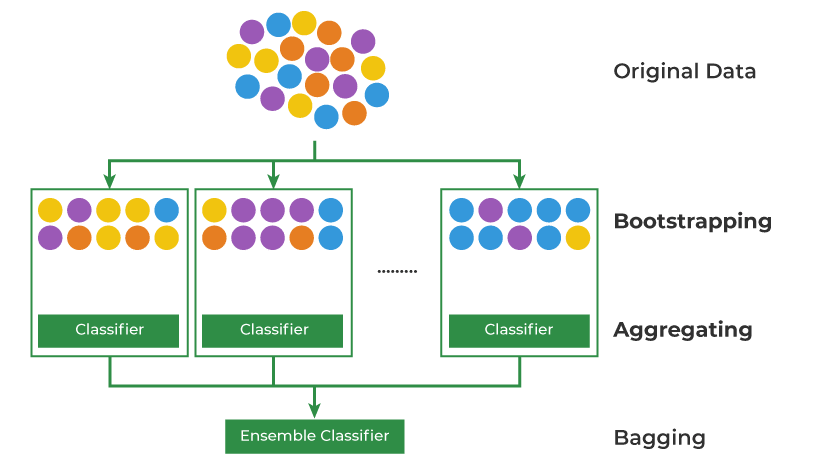

</br>  

Bagging helps improve accuracy and reduce overfitting, especially in models that have high variance.  [1]

###How does Bagging Classifier Work?

The basic steps of how a bagging classifier works are as follows [1]:

Bootstrap Sampling: In Bootstrap Sampling randomly 'n' subsets of original training data are sampled with replacement. This step ensures that the base models are trained on diverse subsets of the data, as some samples may appear multiple times in the new subset, while others may be omitted. It reduces the risks of overfitting and improves the accuracy of the model. [1]

Let's break it down step by step [1]:

> *Original training dataset: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]*

> *Resampled training set 1: [2, 3, 3, 5, 6, 1, 8, 10, 9, 1]*

> *Resampled training set 2: [1, 1, 5, 6, 3, 8, 9, 10, 2, 7]*

> *Resampled training set 3: [1, 5, 8, 9, 2, 10, 9, 7, 5, 4]*

</br>

* **Base Model Training:** In bagging, multiple base models are used. After the Bootstrap Sampling, each base model is independently trained using a specific learning algorithm, such as decision trees, support vector machines, or neural networks on a different bootstrapped subset of data. These models are typically called “Weak learners” because they may not be highly accurate on their own. Since the base model is trained independently of different subsets of data. To make the model computationally efficient and less time-consuming, the base models can be trained in parallel. [1]
* **Aggregation:** Once all the base models are trained, it is used to make predictions on the unseen data i.e. the subset of data on which that base model is not trained. In the bagging classifier, the predicted class label for the given instance is chosen based on the majority voting. The class which has the majority voting is the prediction of the model. [1]
* **Out-of-Bag (OOB) Evaluation:** Some samples are excluded from the training subset of particular base models during the bootstrapping method. These “out-of-bag” samples can be used to estimate the model’s performance without the need for cross-validation. [1]
* **Final Prediction:** After aggregating the predictions from all the base models, Bagging produces a final prediction for each instance. [1]

###Algorithm for the Bagging classifier

> **Classifier generation:**

> Let N be the size of the training set.

> for each of t iterations:

>     sample N instances with replacement from the original training set.
>     apply the learning algorithm to the sample.
>     store the resulting classifier.

> **Classification:**

> for each of the t classifiers:

>     predict class of instance using classifier.

> return class that was predicted most often.

</br>

###Advantages
*   Stable against noise. [2]
*   An effective way to convert weak models into strong learners is by parallel processing. [3]
*   It reduces the variance and overfitting, which helps make a more accurate learning model. [3]
*   It increases the accuracy of machine learning algorithms, which is helpful in regression and statistical classification. [3]

###Disadvantages
*   Needs many comparable classifiers. [2]
*   Sometimes, it can result in underfitting if they have not properly trained the model. [3]
*  Expensive in terms of using several models. [3]

### Gradient Boosting

</br>

**References:**

1.   https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/

</br>

Gradient boosting is essentiall AdaBoost with a fixed base estimator, the decision tree.  <a href="https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/">[1]</a>


This is an essemble method that uses decision trees.  Essentially, you generate a model in training.  Then you take that model and adjust the weights to account for the errors to create a new model.  This process is repeated on the newly generated model, and so on.  Thus the boosting gradually (by gradients), makes better models until the desired results are reached.  <a href="https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/">[1]</a>

In gradient boosting, weights are increased along the decision path for misclassifications and decrease along the easier to classify paths (where there are the fewest misclassifications).  <a href="https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/">[1]</a>

In [17]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
import random
from dsp import sine_wave, triangle_wave, square_wave, generate_class_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split


x, y = generate_class_data(wave_number=100)

# Normalize Data
x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

n_classes = int(np.amax(y_train)+1)
print("number of classes is ",n_classes)

number of classes is  3


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.059):
{'ada__estimator': DecisionTreeClassifier(), 'ada__learning_rate': 1.0, 'ada__n_estimators': 50}
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       1.00      0.91      0.95        11
         2.0       1.00      1.00      1.00        11

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.011):
{'bag__estimator': DecisionTreeClassifier(), 'bag__max_features': 1.0, 'bag__max_samples': 1.0, 'bag__n_estimators': 10}
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         8
         1.0       1.00      0.82      0.90        11
         2.0       1.00      1.00      1.00        11

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.026):
{'gb__criterion': 'friedman_mse', 'gb__learning_rate': 0.1, 'gb__loss': 'log_loss', 'gb__max_depth': 3, 'gb__min_samples_leaf': 1, 'gb__min_samples_split': 2, 'gb__n_estimators': 100, 'gb__subsample': 1.0}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



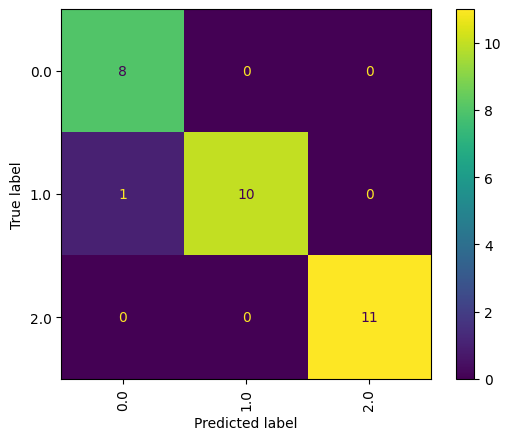

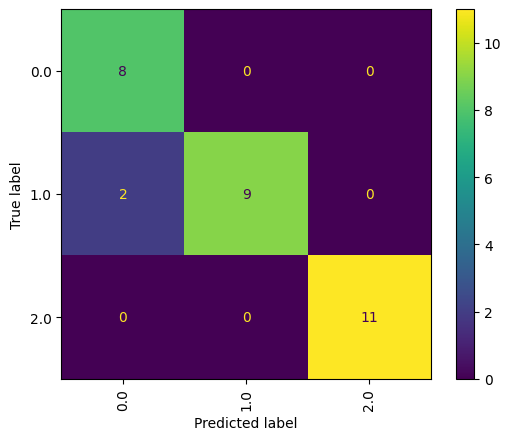

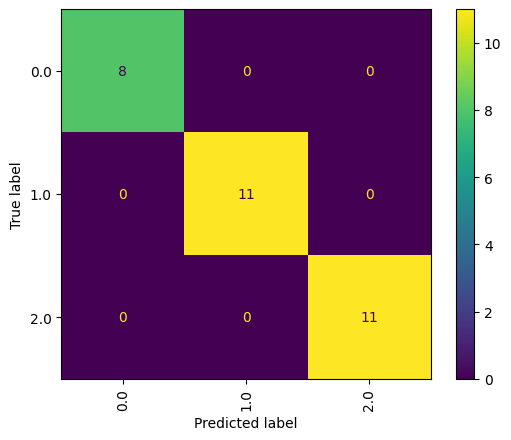

In [18]:
# SETUP & RUN AN SVC GRIDSEARCH TRAINING & TESTING

# import the classifier builders from the cloned python files
import sk_classifier_builder as skc
import sk_grid_builder as sgb

ada = skc.pipeBuild_AdaBoostClassifier(n_estimators=[50],learning_rate=[1.0])
bag = skc.pipeBuild_BaggingClassifier()
gb = skc.pipeBuild_GradientBoostingClassifier()

names=['Adaboost','Bagging','Gradient Boosting']
pipes=[ada,bag,gb]

# Build and run a grid search for classifiers.  Outputs best model and heat map of each type.
sgb.gridsearch_classifier(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,plot_number=3)